In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]


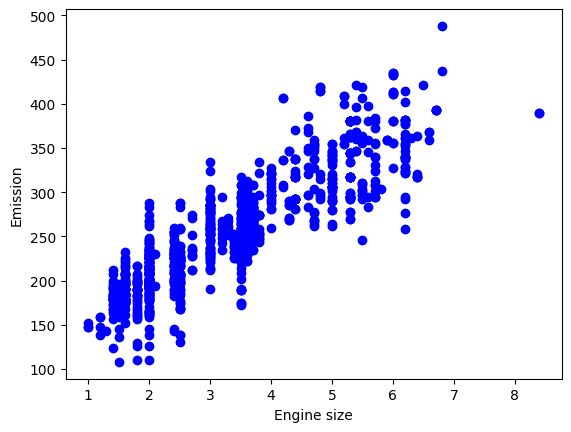

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

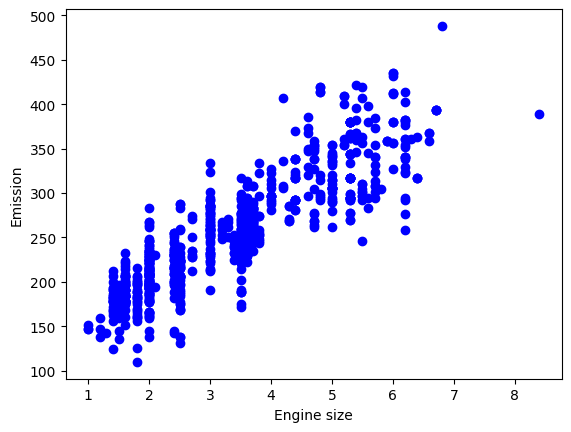

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[9.44468132 8.15285815 9.95952075]]


In [15]:
regr.intercept_

array([62.151487])

In [18]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 584.86
Variance score: 0.84


C:\Users\miras\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [19]:
print("Residual sum of squares (MSE): %.2f" % np.mean((y - y_hat) ** 2))

Residual sum of squares (MSE): 584.86


In [22]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y , y_hat) )

R2-score: 0.84


In [24]:
mask = np.random.rand(len(cdf)) < 0.8
train = cdf[mask]
test = cdf[~mask]

In [31]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','ENGINESIZE', 'CYLINDERS']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 7.29337842  1.45953691 11.0705577   6.95643919]]


In [33]:
x = np.asanyarray(train[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','ENGINESIZE', 'CYLINDERS']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_hat= regr.predict(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','ENGINESIZE', 'CYLINDERS']])
x = np.asanyarray(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','ENGINESIZE', 'CYLINDERS']])
y = np.asanyarray(test[['CO2EMISSIONS']])

Coefficients:  [[ 7.29337842  1.45953691 11.0705577   6.95643919]]


C:\Users\miras\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [35]:
print("Residual sum of squares: %.2f"% np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 607.83
Variance score: 0.85


Text(0, 0.5, 'COE2EMISSIONS')

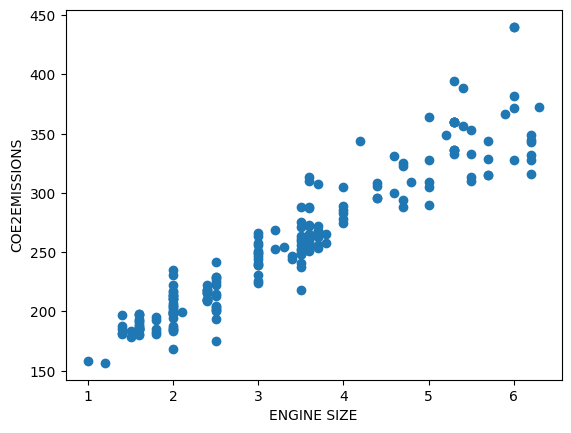

In [39]:
plt.scatter(test[["ENGINESIZE"]], y_hat)
plt.xlabel("ENGINE SIZE")
plt.ylabel("COE2EMISSIONS")

Text(0, 0.5, 'COE2EMISSIONS')

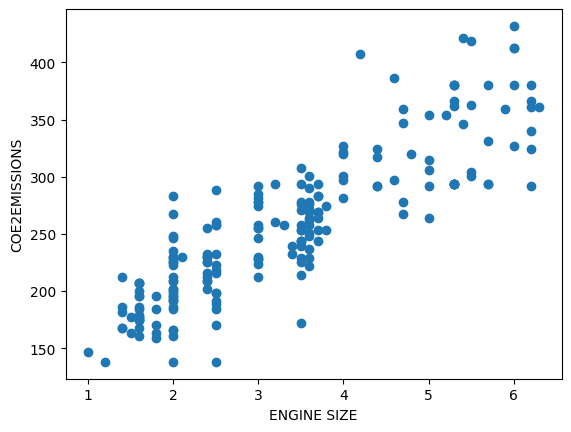

In [43]:
plt.scatter(test[["ENGINESIZE"]], y)
plt.xlabel("ENGINE SIZE")
plt.ylabel("COE2EMISSIONS")